In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("iris.csv")

## Descriptive Analysis

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
numerical = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_num = dataset[numerical]

In [6]:
dataset.isna().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
species         0
dtype: int64

## Feature Correlation using Pearson

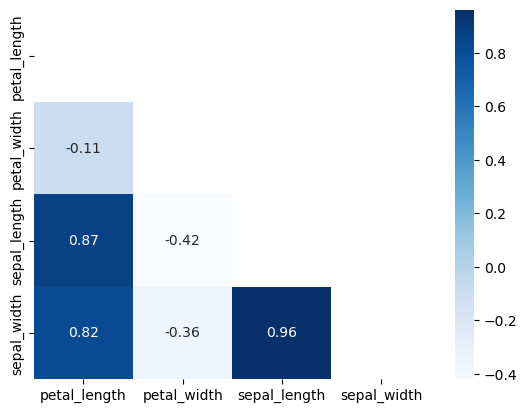

In [7]:
mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))

sns.heatmap(data_num.corr(), cmap='Blues', annot=True, fmt='.2f', mask=mask)
plt.show()

In [8]:
dataset.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Scatterplot Comparison

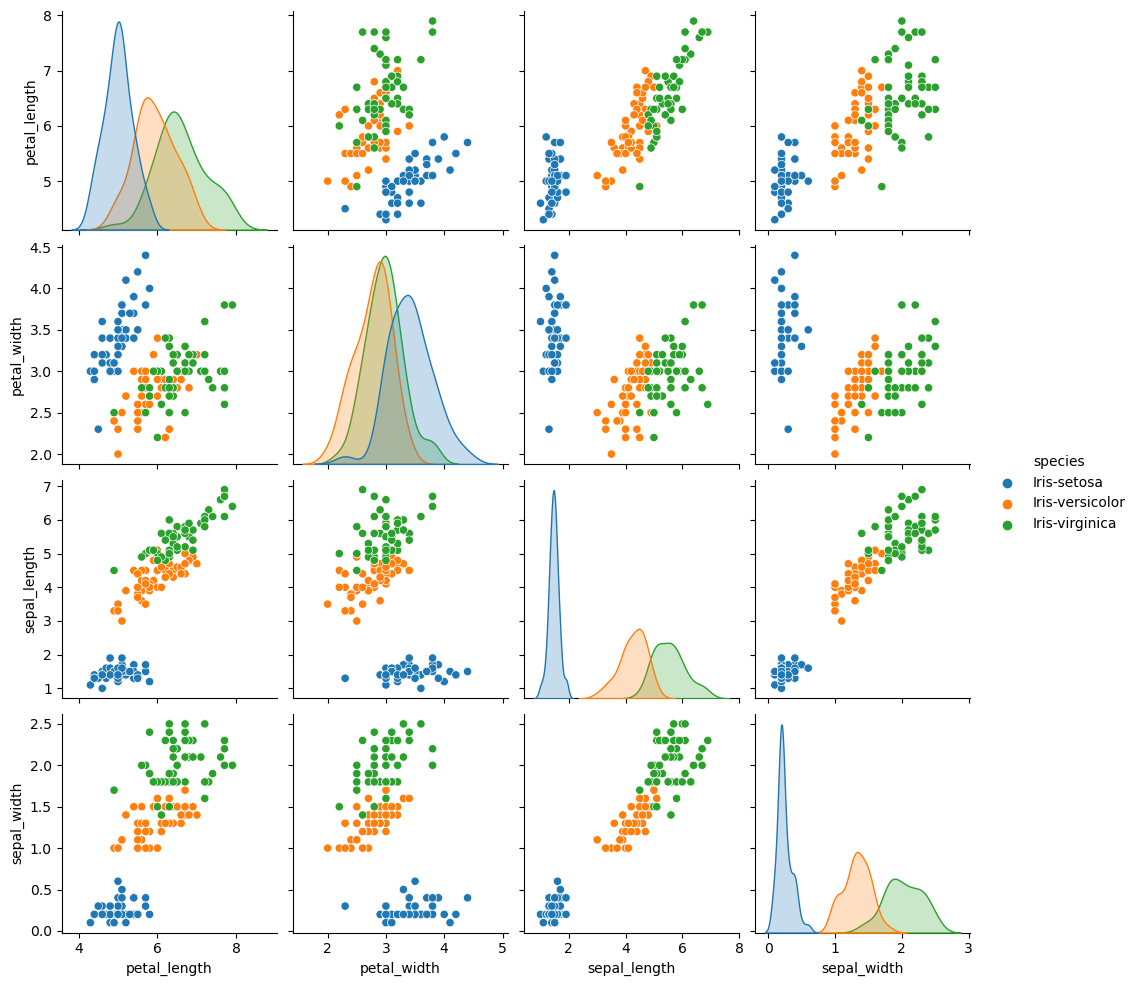

In [10]:
sns.pairplot(dataset, diag_kind='kde', hue="species")
plt.show()

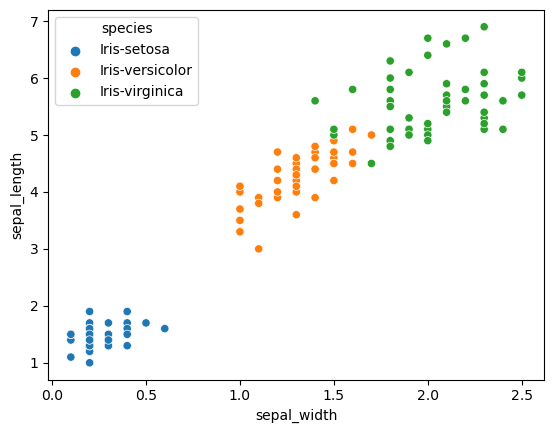

In [11]:
sns.scatterplot(dataset, x="sepal_width", y="sepal_length", hue="species")
plt.show()

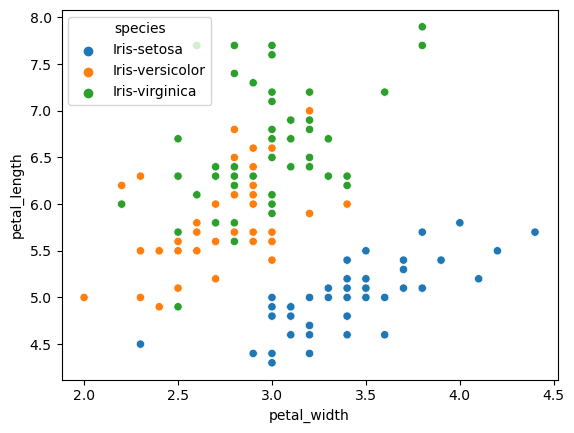

In [12]:
sns.scatterplot(dataset, x="petal_width", y="petal_length", hue="species")
plt.show()

## Feature selection

In [13]:
feature = ["petal_width", "sepal_width"]

X = dataset[feature]
y = dataset["species"].values

In [14]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score

import time

## Data Splitting (90:10)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=89)

In [17]:
print(f"""Jumlah Data Train adalah sebanyak {len(X_train)} data,
dengan persentase total data train sebesar {len(X_train)/len(X)*100}%""")

Jumlah Data Train adalah sebanyak 135 data,
dengan persentase total data train sebesar 90.0%


In [18]:
print(f"""Jumlah Data Test adalah sebanyak {len(X_test)} data,
dengan persentase total data test sebesar {len(X_test)/len(X)*100}%""")

Jumlah Data Test adalah sebanyak 15 data,
dengan persentase total data test sebesar 10.0%


# Manhattan, three neighbors

## Modeling

In [19]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0008337497711181641 ms


In [20]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

## Model Evaluation

In [21]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [22]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred, average="macro")
precision_knn_test  = precision_score(y_test, ytest_knn_pred, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [23]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred, average="macro")
recall_knn_test  = recall_score(y_test, ytest_knn_pred, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


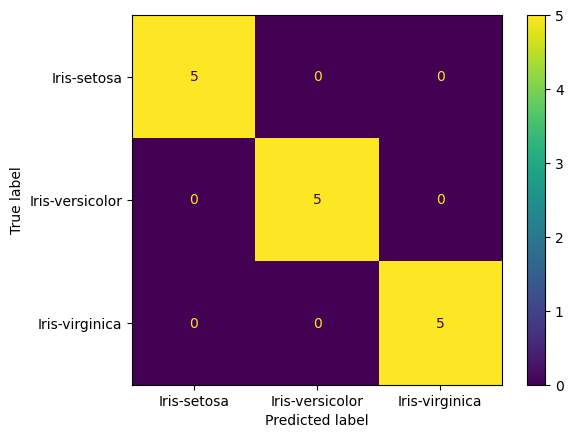

In [24]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

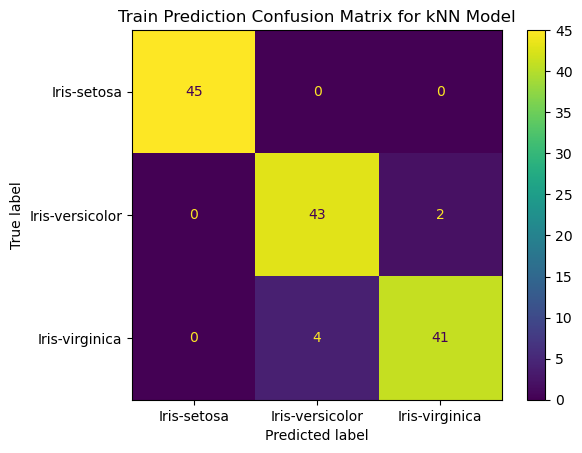

In [25]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Euclidean, three neighbors

## Modeling

In [26]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0011987686157226562 ms


In [27]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

## Model Evaluation

In [28]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.95
Accuracy  (Test Set)     : 1.00


In [29]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred, average="macro")
precision_knn_test  = precision_score(y_test, ytest_knn_pred, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.95
Precision  (Test Set)     : 1.00


In [30]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred, average="macro")
recall_knn_test  = recall_score(y_test, ytest_knn_pred, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.95
Recall  (Test Set)     : 1.00


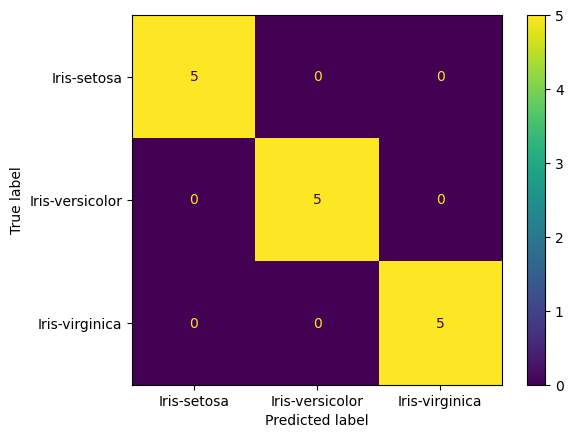

In [31]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

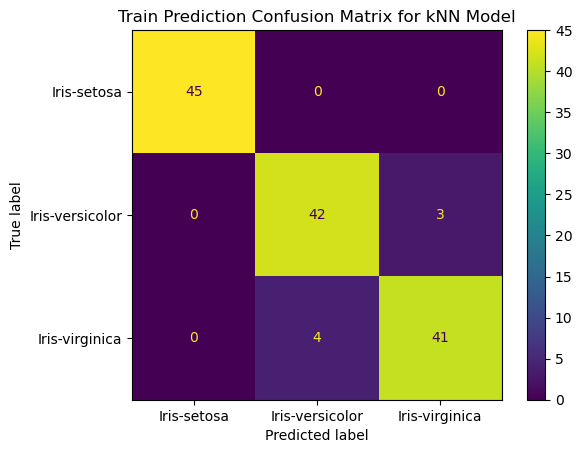

In [32]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Manhattan, five neighbors

## Modeling

In [33]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0017657279968261719 ms


In [34]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

## Model Evaluation

In [35]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.95
Accuracy  (Test Set)     : 1.00


In [36]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred, average="macro")
precision_knn_test  = precision_score(y_test, ytest_knn_pred, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.95
Precision  (Test Set)     : 1.00


In [37]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred, average="macro")
recall_knn_test  = recall_score(y_test, ytest_knn_pred, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.95
Recall  (Test Set)     : 1.00


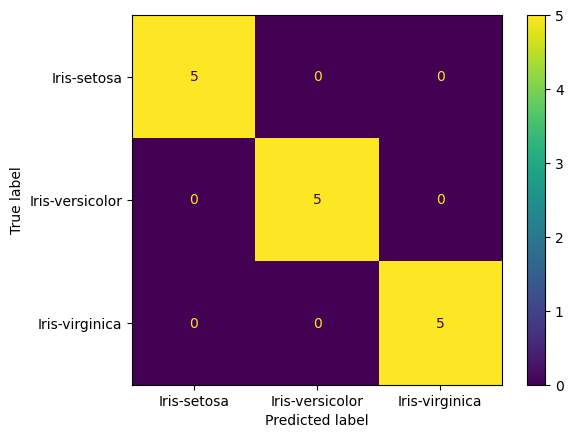

In [38]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

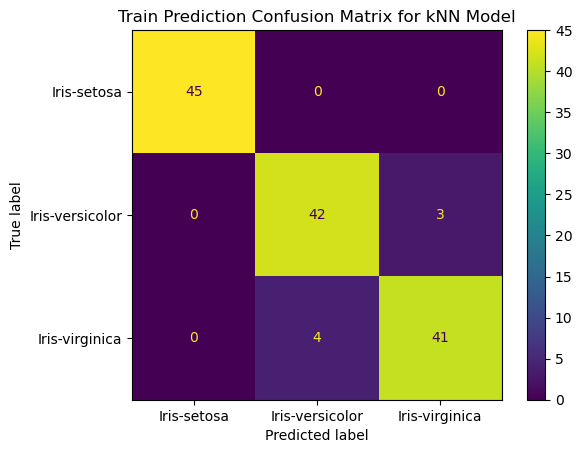

In [39]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Euclidean, five neighbors

## Modeling

In [40]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0011379718780517578 ms


In [41]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

## Model Evaluation

In [42]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [43]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred, average="macro")
precision_knn_test  = precision_score(y_test, ytest_knn_pred, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [44]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred, average="macro")
recall_knn_test  = recall_score(y_test, ytest_knn_pred, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


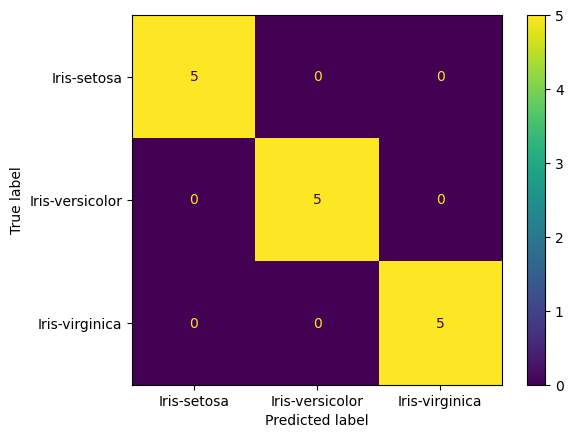

In [45]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

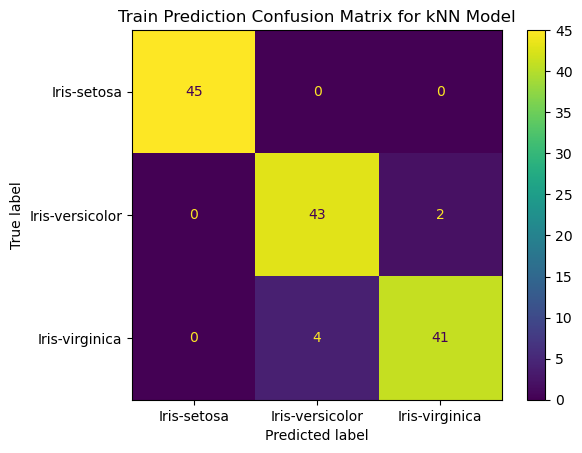

In [46]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Euclidean, fifteen neighbors

## Modeling

In [47]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0014069080352783203 ms


In [48]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

## Model Evaluation

In [49]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.95
Accuracy  (Test Set)     : 1.00


In [50]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred, average="macro")
precision_knn_test  = precision_score(y_test, ytest_knn_pred, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.95
Precision  (Test Set)     : 1.00


In [51]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred, average="macro")
recall_knn_test  = recall_score(y_test, ytest_knn_pred, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.95
Recall  (Test Set)     : 1.00


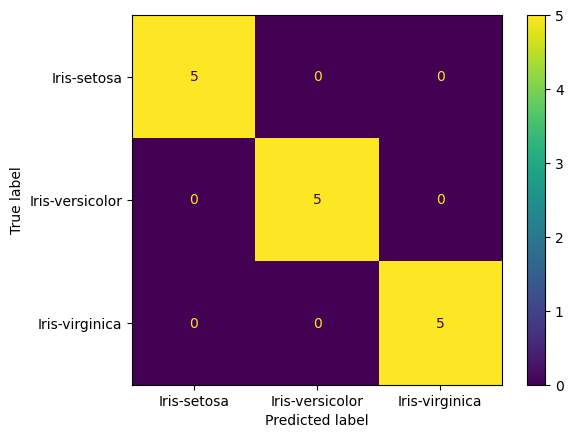

In [52]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

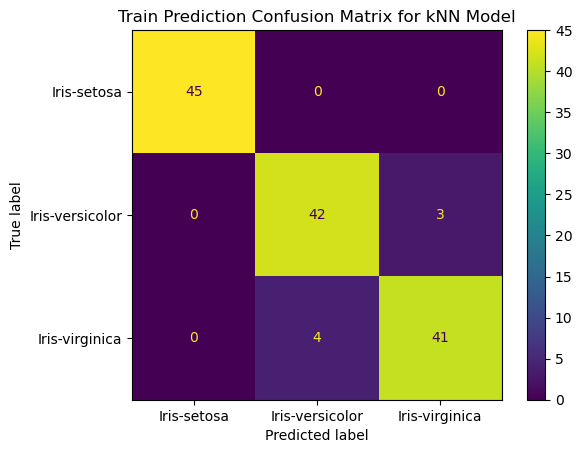

In [53]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# manhattan, fifteen neighbors

## Modeling

In [54]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0008749961853027344 ms


In [55]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

## Model Evaluation

In [56]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [57]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred, average="macro")
precision_knn_test  = precision_score(y_test, ytest_knn_pred, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [58]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred, average="macro")
recall_knn_test  = recall_score(y_test, ytest_knn_pred, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


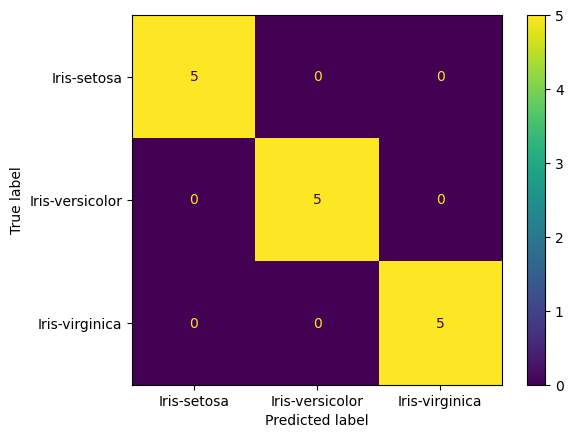

In [59]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

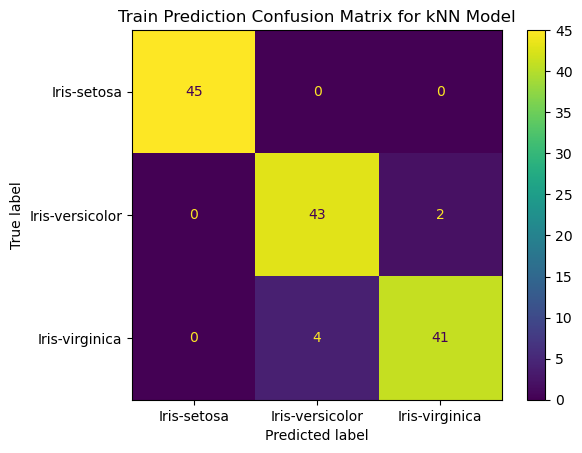

In [60]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Second iteration

In [61]:
dataset_3 = dataset
dataset_3.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
feature_2 = ["petal_width", "sepal_width", "petal_length", "sepal_length"]

X2 = dataset_3[feature_2]
y2 = dataset_3["species"].values

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.1, random_state=89)

# Manhattan, three neighbors

## Modeling

In [68]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train2, y_train2)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.01029205322265625 ms


In [69]:
ytrain_knn_pred2 = knn.predict(X_train2)
ytest_knn_pred2  = knn.predict(X_test2)

## Model Evaluation

In [70]:
accuracy_knn_train2 = accuracy_score(y_train2, ytrain_knn_pred2)
accuracy_knn_test2  = accuracy_score(y_test2, ytest_knn_pred2)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train2)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test2)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [71]:
precision_knn_train2 = precision_score(y_train2, ytrain_knn_pred2, average="macro")
precision_knn_test2  = precision_score(y_test2, ytest_knn_pred2, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train2)
print("Precision  (Test Set)     : %.2f" % precision_knn_test2)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [72]:
recall_knn_train2 = recall_score(y_train2, ytrain_knn_pred2, average="macro")
recall_knn_test2  = recall_score(y_test2, ytest_knn_pred2, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train2)
print("Recall  (Test Set)     : %.2f" % recall_knn_test2)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


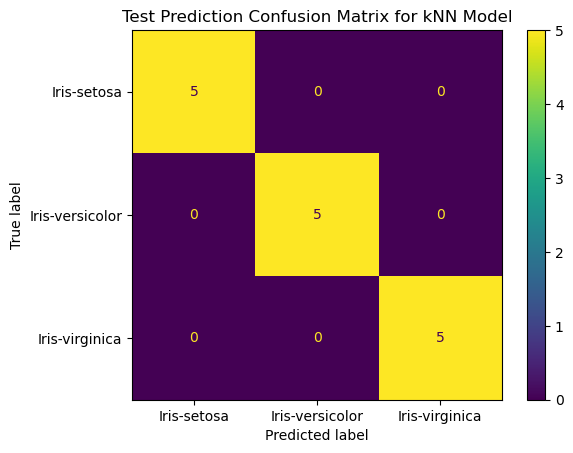

In [76]:
# test prediction confusion matrix

cm = confusion_matrix(y_test2, ytest_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Test Prediction Confusion Matrix for kNN Model")

plt.show()

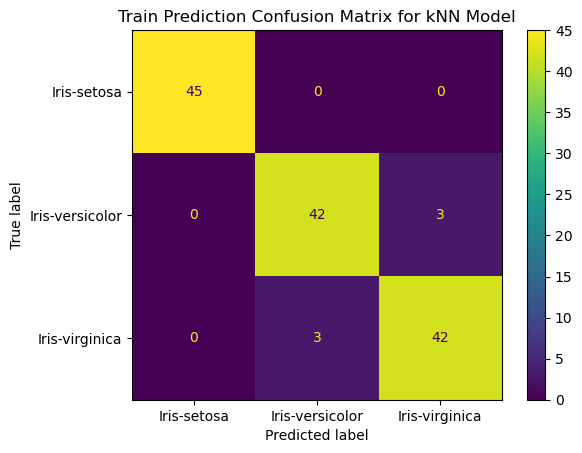

In [77]:
# train prediction confusion matrix

cm = confusion_matrix(y_train2, ytrain_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# euclidean, three neighbors

## Modeling

In [78]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train2, y_train2)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0029540061950683594 ms


In [79]:
ytrain_knn_pred2 = knn.predict(X_train2)
ytest_knn_pred2  = knn.predict(X_test2)

## Model Evaluation

In [80]:
accuracy_knn_train2 = accuracy_score(y_train2, ytrain_knn_pred2)
accuracy_knn_test2  = accuracy_score(y_test2, ytest_knn_pred2)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train2)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test2)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [81]:
precision_knn_train2 = precision_score(y_train2, ytrain_knn_pred2, average="macro")
precision_knn_test2  = precision_score(y_test2, ytest_knn_pred2, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train2)
print("Precision  (Test Set)     : %.2f" % precision_knn_test2)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [82]:
recall_knn_train2 = recall_score(y_train2, ytrain_knn_pred2, average="macro")
recall_knn_test2  = recall_score(y_test2, ytest_knn_pred2, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train2)
print("Recall  (Test Set)     : %.2f" % recall_knn_test2)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


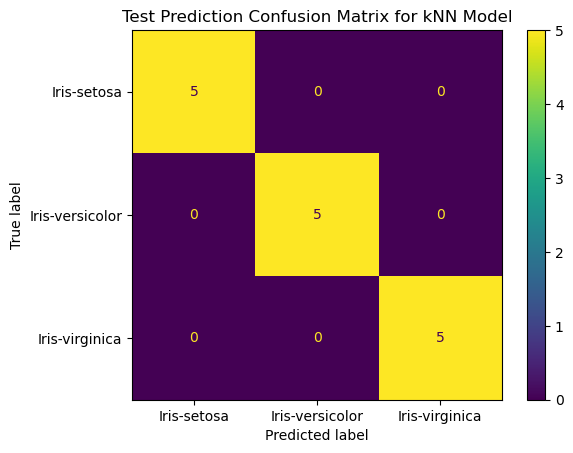

In [83]:
# test prediction confusion matrix

cm = confusion_matrix(y_test2, ytest_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Test Prediction Confusion Matrix for kNN Model")

plt.show()

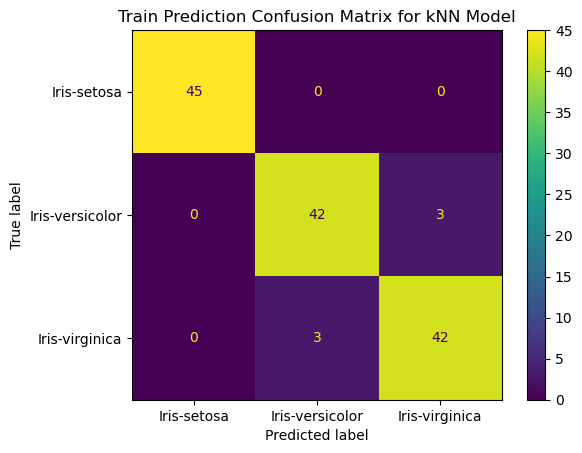

In [84]:
# train prediction confusion matrix

cm = confusion_matrix(y_train2, ytrain_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Manhattan, five neighbors

## Modeling

In [85]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train2, y_train2)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0035431385040283203 ms


In [86]:
ytrain_knn_pred2 = knn.predict(X_train2)
ytest_knn_pred2  = knn.predict(X_test2)

## Model Evaluation

In [87]:
accuracy_knn_train2 = accuracy_score(y_train2, ytrain_knn_pred2)
accuracy_knn_test2  = accuracy_score(y_test2, ytest_knn_pred2)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train2)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test2)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [88]:
precision_knn_train2 = precision_score(y_train2, ytrain_knn_pred2, average="macro")
precision_knn_test2  = precision_score(y_test2, ytest_knn_pred2, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train2)
print("Precision  (Test Set)     : %.2f" % precision_knn_test2)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [89]:
recall_knn_train2 = recall_score(y_train2, ytrain_knn_pred2, average="macro")
recall_knn_test2  = recall_score(y_test2, ytest_knn_pred2, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train2)
print("Recall  (Test Set)     : %.2f" % recall_knn_test2)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


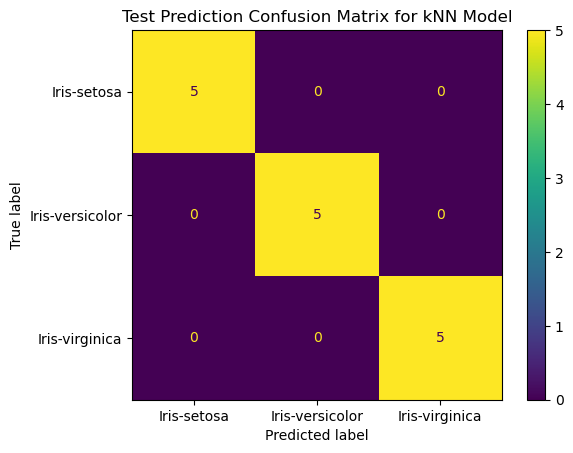

In [90]:
# test prediction confusion matrix

cm = confusion_matrix(y_test2, ytest_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Test Prediction Confusion Matrix for kNN Model")

plt.show()

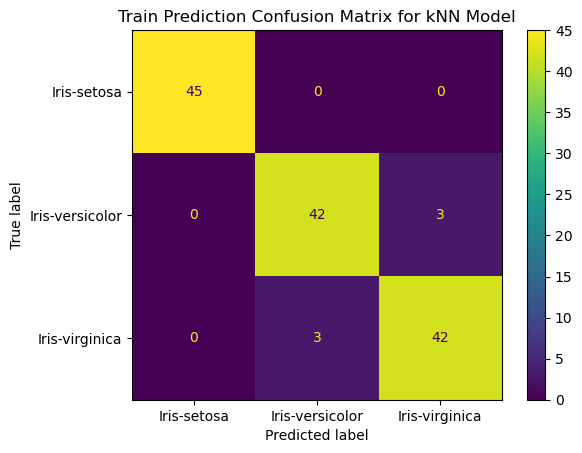

In [91]:
# train prediction confusion matrix

cm = confusion_matrix(y_train2, ytrain_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# euclidean, five neighbors

## Modeling

In [92]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train2, y_train2)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.002950906753540039 ms


In [93]:
ytrain_knn_pred2 = knn.predict(X_train2)
ytest_knn_pred2  = knn.predict(X_test2)

## Model Evaluation

In [94]:
accuracy_knn_train2 = accuracy_score(y_train2, ytrain_knn_pred2)
accuracy_knn_test2  = accuracy_score(y_test2, ytest_knn_pred2)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train2)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test2)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [95]:
precision_knn_train2 = precision_score(y_train2, ytrain_knn_pred2, average="macro")
precision_knn_test2  = precision_score(y_test2, ytest_knn_pred2, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train2)
print("Precision  (Test Set)     : %.2f" % precision_knn_test2)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [96]:
recall_knn_train2 = recall_score(y_train2, ytrain_knn_pred2, average="macro")
recall_knn_test2  = recall_score(y_test2, ytest_knn_pred2, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train2)
print("Recall  (Test Set)     : %.2f" % recall_knn_test2)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


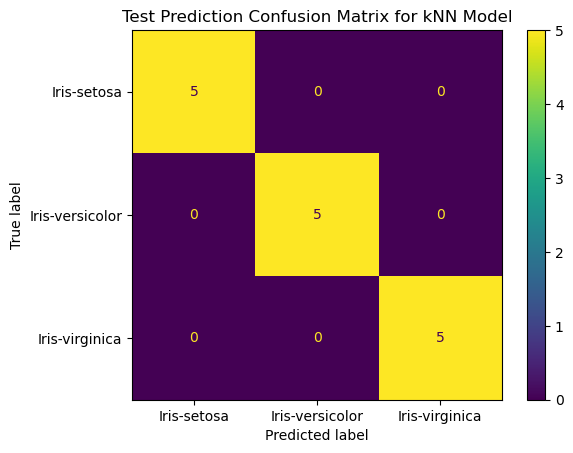

In [97]:
# test prediction confusion matrix

cm = confusion_matrix(y_test2, ytest_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Test Prediction Confusion Matrix for kNN Model")

plt.show()

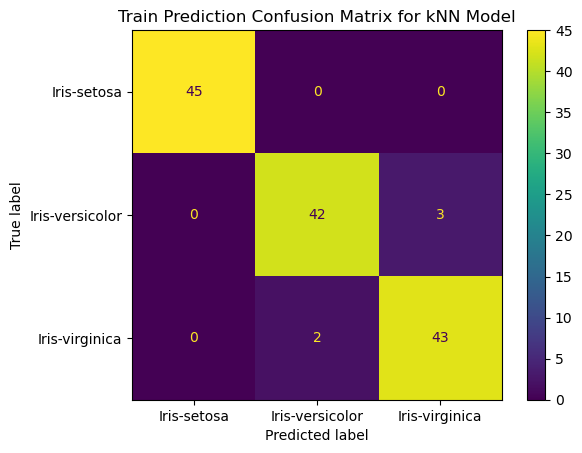

In [98]:
# train prediction confusion matrix

cm = confusion_matrix(y_train2, ytrain_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Manhattan, fifteen neighbors

## Modeling

In [99]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn.fit(X_train2, y_train2)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.00296783447265625 ms


In [100]:
ytrain_knn_pred2 = knn.predict(X_train2)
ytest_knn_pred2  = knn.predict(X_test2)

## Model Evaluation

In [101]:
accuracy_knn_train2 = accuracy_score(y_train2, ytrain_knn_pred2)
accuracy_knn_test2  = accuracy_score(y_test2, ytest_knn_pred2)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train2)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test2)

Accuracy  (Train Set)    : 0.96
Accuracy  (Test Set)     : 1.00


In [102]:
precision_knn_train2 = precision_score(y_train2, ytrain_knn_pred2, average="macro")
precision_knn_test2  = precision_score(y_test2, ytest_knn_pred2, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train2)
print("Precision  (Test Set)     : %.2f" % precision_knn_test2)

Precision  (Train Set)    : 0.96
Precision  (Test Set)     : 1.00


In [103]:
recall_knn_train2 = recall_score(y_train2, ytrain_knn_pred2, average="macro")
recall_knn_test2  = recall_score(y_test2, ytest_knn_pred2, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train2)
print("Recall  (Test Set)     : %.2f" % recall_knn_test2)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 1.00


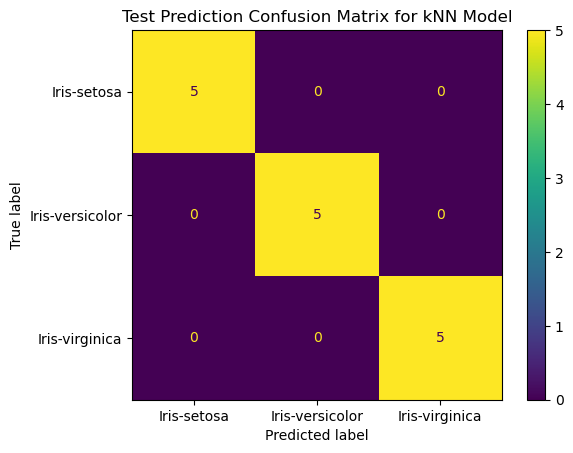

In [104]:
# test prediction confusion matrix

cm = confusion_matrix(y_test2, ytest_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Test Prediction Confusion Matrix for kNN Model")

plt.show()

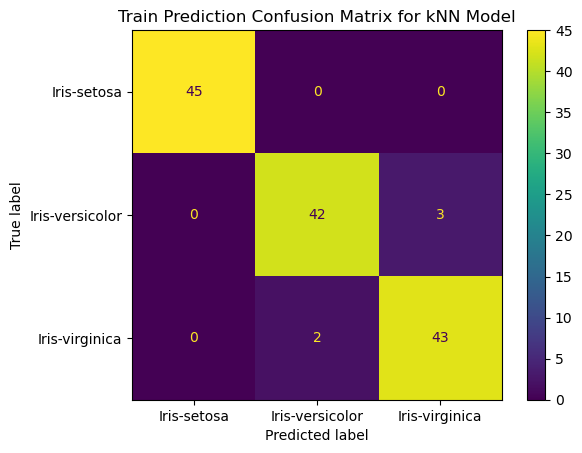

In [105]:
# train prediction confusion matrix

cm = confusion_matrix(y_train2, ytrain_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# euclidean, fifteen neighbors

## Modeling

In [106]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train2, y_train2)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.004364967346191406 ms


In [107]:
ytrain_knn_pred2 = knn.predict(X_train2)
ytest_knn_pred2  = knn.predict(X_test2)

## Model Evaluation

In [108]:
accuracy_knn_train2 = accuracy_score(y_train2, ytrain_knn_pred2)
accuracy_knn_test2  = accuracy_score(y_test2, ytest_knn_pred2)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train2)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test2)

Accuracy  (Train Set)    : 0.99
Accuracy  (Test Set)     : 1.00


In [109]:
precision_knn_train2 = precision_score(y_train2, ytrain_knn_pred2, average="macro")
precision_knn_test2  = precision_score(y_test2, ytest_knn_pred2, average="macro")
print("Precision  (Train Set)    : %.2f" % precision_knn_train2)
print("Precision  (Test Set)     : %.2f" % precision_knn_test2)

Precision  (Train Set)    : 0.99
Precision  (Test Set)     : 1.00


In [110]:
recall_knn_train2 = recall_score(y_train2, ytrain_knn_pred2, average="macro")
recall_knn_test2  = recall_score(y_test2, ytest_knn_pred2, average="macro")
print("Recall  (Train Set)    : %.2f" % recall_knn_train2)
print("Recall  (Test Set)     : %.2f" % recall_knn_test2)

Recall  (Train Set)    : 0.99
Recall  (Test Set)     : 1.00


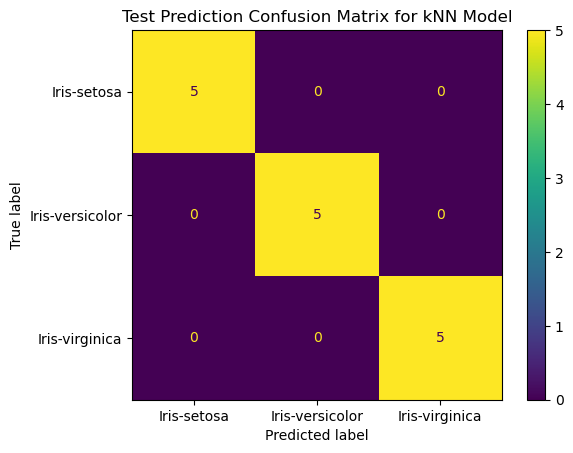

In [111]:
# test prediction confusion matrix

cm = confusion_matrix(y_test2, ytest_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Test Prediction Confusion Matrix for kNN Model")

plt.show()

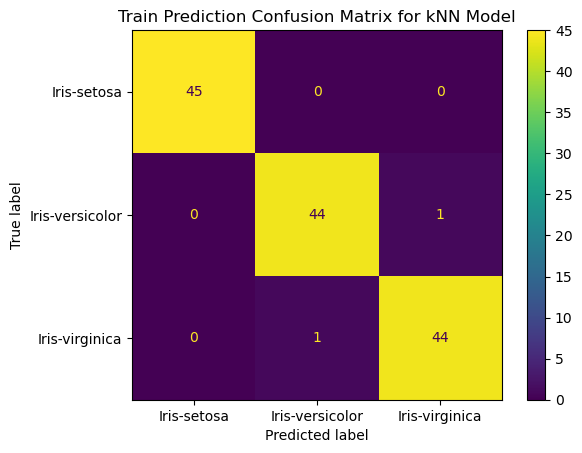

In [112]:
# train prediction confusion matrix

cm = confusion_matrix(y_train2, ytrain_knn_pred2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Train Prediction Confusion Matrix for kNN Model")
plt.show()

# Searching Feature to Target Correlation

In [64]:
dataset_2 = dataset

In [65]:
mapping_species = {
    'Iris-setosa'   : 0,
    'Iris-versicolor' : 1, 
    'Iris-virginica'  :2
}

dataset_2['species'] = dataset_2['species'].map(mapping_species)

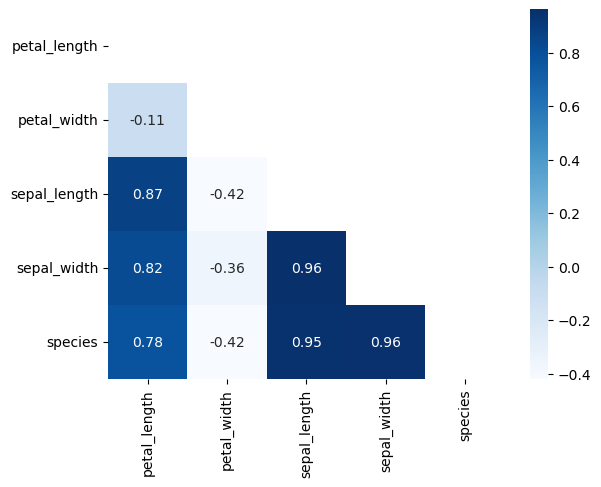

In [66]:
mask = np.triu(np.ones_like(dataset_2.corr(), dtype=bool))

sns.heatmap(dataset_2.corr(), cmap='Blues', annot=True, fmt='.2f', mask=mask)
plt.show()

> [1] sepal_width = 0.96

> [2] sepal_length = 0.95

> [3] petal_length = 0.78

> [4] petal_width = 0.42